In [1]:
!pip install easyocr
!pip instal PIL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 11.0 MB/s eta 0:00:00
ERROR: unknown command "instal" - maybe you meant "install"


In [2]:
import easyocr
from PIL import Image
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import re

In [3]:
# URL архива
url = "https://lodmedia.hb.bizmrg.com/case_files/993800/train_dataset_%D0%94%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82.zip"

# Выполнение GET-запроса и скачивание файла
response = requests.get(url)
with open('archive.zip', 'wb') as f:
    f.write(response.content)

# Распаковка архива
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

print("Архив распакован в папку extracted_folder")

Архив распакован в папку extracted_folder


In [4]:
def text_file(file_path):
    """Перевод изображения в текст, на вход получает путь к файлу"""
    try:
        reader = easyocr.Reader(["en", "ru"])
        result = reader.readtext(file_path)
        print(f"Текст добавлен{file_path}")
        return result
    except Exception as e:
        print(f"Ошибка при переводе изображения в текст: {e}")
        return np.nan

In [5]:
def open_image(image_path):
    """Открывает изображение по указанному пути и возвращает объект PIL Image."""
    image = Image.open(image_path)

    return image

In [6]:
def resolution_image(image_path):
    """
    Открывает изображение и выводит его разрешение.

    :param image_path: Путь к файлу изображения.
    :return: Разрешение изображения в виде кортежа (ширина, высота).
             В случае ошибки при обработке изображения, возвращает np.nan.
    """
    try:
        with Image.open(image_path) as img:
            resolution = img.size
            return resolution
    except Exception as e:
        print(f"Ошибка при обработке изображения {image_path}: {e}")
        return np.nan


In [7]:
# Создание DataFrame из файлов
df_tg = pd.read_excel('/content/extracted_folder/tg/tg.xlsx')

In [8]:
df_tg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   VR      305 non-null    object
 1   image   305 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [9]:
file_name = df_tg['image'].loc[5]
df_tg.loc[5]

VR                                             52
image    daf44397-9292-478f-a9c8-864b946622dd.jpg
Name: 5, dtype: object

Файл - /content/extracted_folder/tg/images/daf44397-9292-478f-a9c8-864b946622dd.jpg


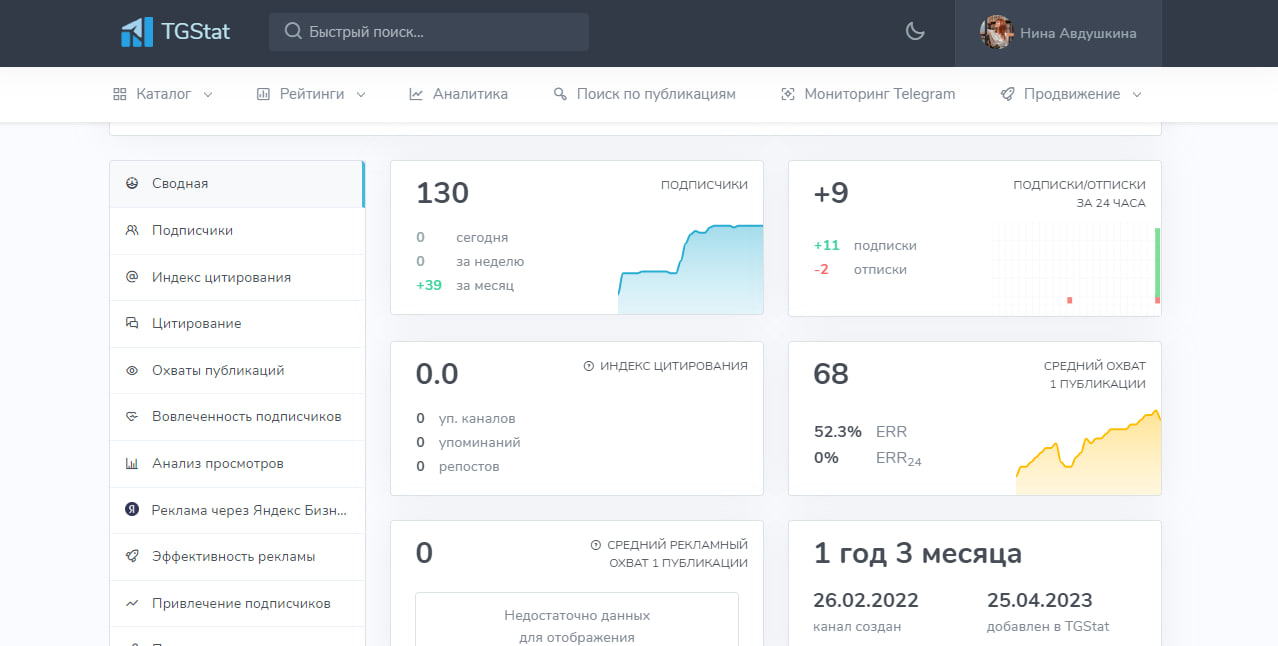

In [10]:
file_path1 = '/content/extracted_folder/tg/images/' + file_name
print(f"Файл - {file_path1}")
# Функция которая открывает файл, выводит из DataFrame значение
open_image(file_path1)

In [11]:
 text_search = text_file(file_path1)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% CompleteТекст добавлен/content/extracted_folder/tg/images/daf44397-9292-478f-a9c8-864b946622dd.jpg


In [12]:
text_search

[([[158, 16], [234, 16], [234, 44], [158, 44]], 'TGStat', 0.9999989293261206),
 ([[307, 23], [427, 23], [427, 43], [307, 43]],
  'Быстрый ПОИСК .',
  0.5730883220703504),
 ([[1017, 25], [1139, 25], [1139, 43], [1017, 43]],
  'Нина Авдушкина',
  0.9211123916771483),
 ([[135, 87], [195, 87], [195, 103], [135, 103]],
  'Каталог',
  0.854899778927851),
 ([[279, 87], [347, 87], [347, 103], [279, 103]],
  'Рейтинги',
  0.9962235947259046),
 ([[433, 87], [511, 87], [511, 103], [433, 103]],
  'Аналитика',
  0.9999343940782712),
 ([[575, 84], [739, 84], [739, 105], [575, 105]],
  'Поиск по публикациям',
  0.9948082500178187),
 ([[802, 86], [959, 86], [959, 105], [802, 105]],
  'Мониторинг Telegram',
  0.9998828761220232),
 ([[1022, 86], [1123, 86], [1123, 106], [1022, 106]],
  'Продвижение',
  0.999995399295026),
 ([[150, 176], [211, 176], [211, 194], [150, 194]],
  'Сводная',
  0.9998636548910877),
 ([[659, 179], [751, 179], [751, 193], [659, 193]],
  'подписчики',
  0.7708333405829165),
 ([[1

In [13]:
# Регулярное выражение для поиска строки, содержащей 'Err' (регистронезависимо)
pattern = re.compile(r'err', re.IGNORECASE)

# Список для хранения индексов, соответствующих регулярному выражению
matching_indices = []

# Перебор кортежей и их элементов для поиска совпадений
for index, tup in enumerate(text_search):
    for item in tup:
        if isinstance(item, str) and re.search(pattern, item):
            matching_indices.append(index)
            print(f"Совпадение найдено в индексе {index}: {tup}")
            break  # Прерываем цикл, если найдено соответствие хотя бы в одном элементе кортежа

print("Индексы совпадений:", matching_indices)

Совпадение найдено в индексе 35: ([[873, 421], [909, 421], [909, 441], [873, 441]], 'ERR', 0.9999975911073493)
Совпадение найдено в индексе 40: ([[875, 451], [925, 451], [925, 469], [875, 469]], 'ERR24', 0.9114498028846986)
Индексы совпадений: [35, 40]


In [14]:
r = matching_indices[0] -1

# Определяем координаты интересующей области

x1 = text_search[r][0][0][0]
x2 = text_search[r][0][1][0]
y1 = text_search[r][0][0][1]
y2 = text_search[r][0][3][1]
print(f"Координаты x1 - {x1}, y1 - {y1}, x2 - {x2}, y2 - {y2}")

image = Image.open(file_path1)  # Загрузка изображения

# Кадрируем область изображения
cropped_image = image.crop((x1, y1, x2, y2))
cropped_image


Координаты x1 - 811, y1 - 421, x2 - 865, y2 - 441


In [15]:
# Удаляем последний символ и переводим в float
float(text_search[r][1][:-1])

52.3